# Module 6. Labs regression analysis

## Exercise 1: Relation between heart weight and body weight in Cats

### Part 1

Perform a linear regression analysis on the variables body weight (`Bwt`, dependent variable) and heart weight (`Hwt`, independent variabele).


1. Import the dataset `Cats.csv`.


In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

In [2]:
cats = pd.read_csv('../data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables.


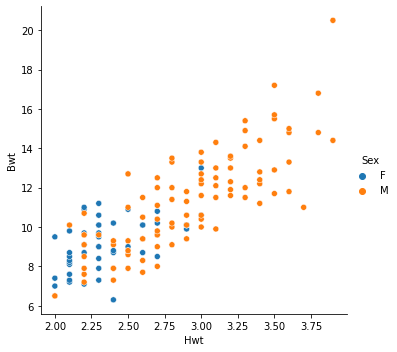

In [3]:
#2. Draw a scatter plot of Cats.Hwt and Cats.Bwt
sns.relplot(x=cats.Hwt,y= cats.Bwt, hue=cats.Sex) 

3. Calculate and draw the regression line.


<AxesSubplot:xlabel='Hwt', ylabel='Bwt'>

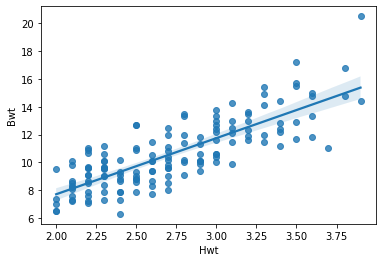

In [4]:
sns.regplot(x=cats.Hwt,y=cats.Bwt)

In [5]:
from sklearn.linear_model import LinearRegression

male_chinstrap_x = cats.Hwt.values.reshape(-1,1)
male_chinstrap_y = cats.Bwt

weight_model = LinearRegression().fit(male_chinstrap_x, male_chinstrap_y)

print(f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line: ŷ = -0.35 + 4.03 x


4. Calculate the correlation coefficient and the coefficient of determination.

In [6]:
cor = np.corrcoef(cats.Hwt, cats.Bwt)[0][1]
print(f"R = {cor}")

R = 0.804134787315513


In [7]:
print(f"R² = {cor ** 2}")

R² = 0.6466327561709654


In [8]:
# mx = cats.Hwt.mean()
# my = cats.Bwt.mean()

# covar = sum((cats.Hwt - mx) * (cats.Bwt - my)) / (len(cats.Hwt) - 1)
# print(f"Cov(x,y) = {covar}")


5. Interpret the results from the previous steps.

#er is een sterk verband
https://i.imgur.com/P97PdXF.


In [9]:
#er is een sterk verband
#https://i.imgur.com/P97PdXF.



### Part 2

1. Perform a linear regression analysis on the variables body weight (`Bwt`) and heart weight (`Hwt`), but this time **subdivided by gender** (`Sex`). Use the same dataset (`Cats.csv`).


In [10]:
male_cats = cats[(cats['Sex'] == 'M')]
male_cats.head()

,ID,Sex,Hwt,Bwt
47,48,M,2.0,6.5
48,49,M,2.0,6.5
49,50,M,2.1,10.1
50,51,M,2.2,7.2
51,52,M,2.2,7.6


2. Draw a scatter plot of both variables for each gender.


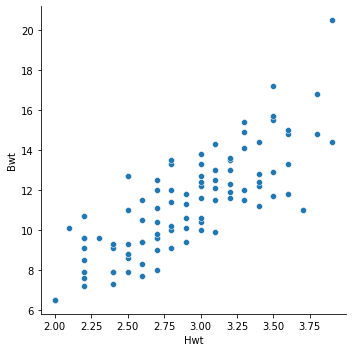

In [11]:
sns.relplot(x=male_cats.Hwt,y= male_cats.Bwt)

3. Calculate and draw the regression line.


<AxesSubplot:xlabel='Hwt', ylabel='Bwt'>

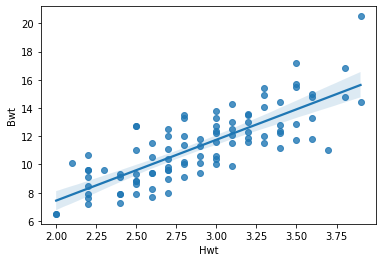

In [12]:
sns.regplot(x = male_cats.Hwt, y = male_cats.Bwt)

In [13]:
from sklearn.linear_model import LinearRegression

male_cats_x = male_cats.Hwt.values.reshape(-1,1)
male_cats_y = male_cats.Bwt

weight_model = LinearRegression().fit(male_cats_x, male_cats_y)

print(f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line: ŷ = -1.18 + 4.31 x


4. Calculate the correlation coefficient and the coefficient of determination.


In [14]:
cor = np.corrcoef(male_cats.Hwt, male_cats.Bwt)[0][1]
print(f"R = {cor}")
print(f"R² = {cor ** 2}")

R = 0.7930443171812304
R² = 0.628919289013444


5. Interpret the results from the previous steps.

In [15]:
#strong correlation

### Answers

| Selection |  $\beta_0$ | $\beta_1$ |       $R$ |     $R^2$ |
| :-------- | ---------: | --------: | --------: | --------: |
| All       | -0.3510784 | 4.0317575 | 0.8041348 | 0.6466328 |
| Male      | -1.1768253 | 4.3098189 | 0.7930443 | 0.6289193 |
| Female    |  2.9813124 |  2.636414 | 0.5320497 | 0.2830768 |


## Exercise 2: Vlaamse land en tuinbouwbedrijven

1. Use the dataset Landbouw Vlaanderen. The file contains data about farms in Vlaanderen

Source: Departement Landbouw en Visserij op basis StatBel

In [28]:
landbouw = pd.read_csv('../data/Landbouw%20Vlaanderen.csv', delimiter = ";")
# Show the first few records of the Data Frame
landbouw.head(11)

,jaar,aantal land en tuinbouwbedrijven,gemiddelde oppervlakte per bedrijf (ha)
0,1980,75706,"8,38"
1,1981,73292,"8,58"
2,1982,71255,"8,79"
3,1983,69807,"8,94"
4,1984,68083,"9,15"
5,1985,66408,"9,33"
6,1986,64624,"9,53"
7,1987,62814,"9,76"
8,1988,60983,"9,98"
9,1989,59365,"10,19"


2. What are the datatypes for each of the columns.

In [17]:
landbouw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   jaar                                     41 non-null     int64 
 1   aantal land en tuinbouwbedrijven         41 non-null     int64 
 2   gemiddelde oppervlakte per bedrijf (ha)  41 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


3. Change the datatype of 'gemiddelde oppervlakte per bedrijf (ha)' to float.

In [18]:
landbouw["gemiddelde oppervlakte per bedrijf (ha)"] = landbouw["gemiddelde oppervlakte per bedrijf (ha)"].str.replace(",", ".").astype(float)
landbouw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   jaar                                     41 non-null     int64  
 1   aantal land en tuinbouwbedrijven         41 non-null     int64  
 2   gemiddelde oppervlakte per bedrijf (ha)  41 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


4. Draw a scatter plot of the number of farms versus the year.


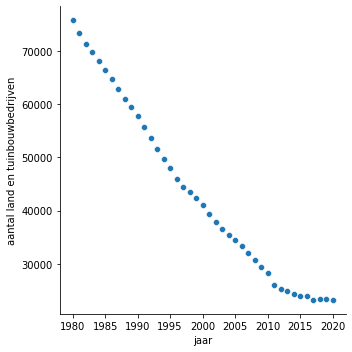

In [19]:
sns.relplot(y=landbouw["aantal land en tuinbouwbedrijven"],x= landbouw["jaar"])

5. Is there a positive / negative relationship between jaar and 'aantal land en tuinbouwbedrijven'?

R = -0.9861066349492859

In [20]:
cor = np.corrcoef(landbouw["jaar"], landbouw["aantal land en tuinbouwbedrijven"])[0][1]
print(f"R = {cor}")

R = -0.9861066349492859


In [21]:

print(f"R² = {cor ** 2}")

R² = 0.9724062954910041


6. Is there a strong relationship between jaar and 'aantal land en tuinbouwbedrijven'?

R² = 0.9724062954910041

7. Draw a scatter plot of the 'gemiddelde oppervlakte per bedrijf (ha)' versus the year.

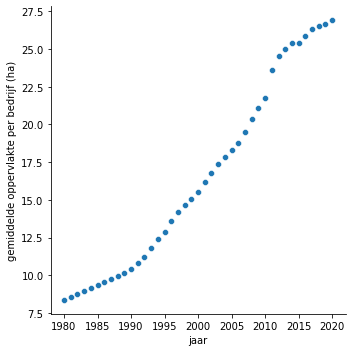

In [22]:
sns.relplot(x= landbouw["jaar"], y= landbouw["gemiddelde oppervlakte per bedrijf (ha)"])

8. What will be the 'gemiddelde oppervlakte per bedrijf (ha)' in 2035?

Gemiddelde oppervlakte in 2035 = 34.91987804878045

In [23]:
from matplotlib.collections import LineCollection
import math
xmin = math.floor(landbouw["jaar"].min() / 10) * 10
xmax = math.ceil(landbouw["jaar"].max() / 10) * 10

ymin = math.floor(landbouw["gemiddelde oppervlakte per bedrijf (ha)"].min() / 10) * 10
ymax = math.ceil(landbouw["gemiddelde oppervlakte per bedrijf (ha)"].max() / 10) * 10


In [24]:
mx = landbouw["jaar"].mean()
my = landbouw["gemiddelde oppervlakte per bedrijf (ha)"].mean()
xx = landbouw["jaar"] - mx
yy = landbouw["gemiddelde oppervlakte per bedrijf (ha)"]- my
beta1 = sum(xx * yy) / sum(xx ** 2)
beta0 = my - beta1 * mx

# Regression line equation
print(f"ŷ = {beta0:.2f} + {beta1:.2f} x")

ŷ = -1031.90 + 0.52 x


<AxesSubplot:xlabel='jaar', ylabel='gemiddelde oppervlakte per bedrijf (ha)'>

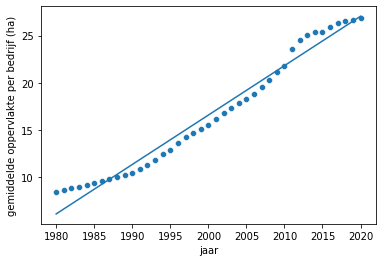

In [27]:
x_values = [xmin, xmax]
y_values = [beta1 * x_values[0] + beta0, beta1 * x_values[1] + beta0]

sns.lineplot(x=x_values, y=y_values)
sns.scatterplot(x= landbouw["jaar"], y=landbouw["gemiddelde oppervlakte per bedrijf (ha)"])


In [328]:
print(f"ŷ = {beta0:.2f} + {beta1:.2f} x 2035")

print(f"Gemiddelde oppervlakte in 2035 = {beta0 + beta1 *2035}")

ŷ = -1031.90 + 0.52 x 2035
Gemiddelde oppervlakte in 2035 = 34.91987804878045


8. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

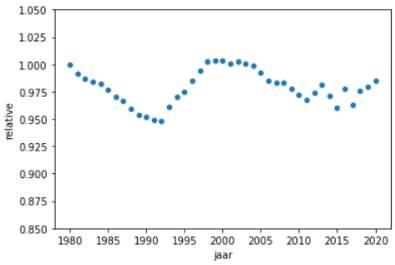


landbouw tot 1980
- nieuwe kolom met totale oppervlatke per jaar (in aparte kolom in df)
- getal eruit halen voor 1980$

help = landbouw.iloc(0,3)
- nieuwe kolom met relatieve verschil tov 1980
- 1 - (aparte kolom met relatieve verschil tov 1980)

In [329]:
landbouw["totale opp per jaar"] = landbouw["gemiddelde oppervlakte per bedrijf (ha)"] * landbouw["aantal land en tuinbouwbedrijven"] 
help = landbouw.iloc[0, 3]
landbouw["relative"] = landbouw["totale opp per jaar"]/ help
print(help)

634416.28


In [330]:
landbouw.head(10)

,jaar,aantal land en tuinbouwbedrijven,gemiddelde oppervlakte per bedrijf (ha),totale opp per jaar,relative
0,1980,75706,8.38,634416.28,1.000000
1,1981,73292,8.58,628845.36,0.991219
2,1982,71255,8.79,626331.45,0.987256
3,1983,69807,8.94,624074.58,0.983699
4,1984,68083,9.15,622959.45,0.981941
5,1985,66408,9.33,619586.64,0.976625
6,1986,64624,9.53,615866.72,0.970761
7,1987,62814,9.76,613064.64,0.966344
8,1988,60983,9.98,608610.34,0.959323
9,1989,59365,10.19,604929.35,0.953521


(0.85, 1.05)

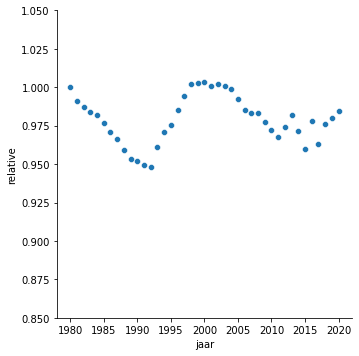

In [331]:
sns.relplot(data=landbouw, y="relative", x="jaar")
plt.ylim(0.85,1.05)

## Exercise 3: Movies of 2006 and 2007

1. The file Movies_2006_2007 contains information on over 200
movies that were released during 2006 and 2007.

In [350]:
movies = pd.read_csv('../data/Movies_2006_2007.csv', delimiter = ";", encoding='cp1252')
# Show the first few records of the Data Frame
movies

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,$22 707 121,$32 109 139,$39 517 763,$11 000 000,$15 909 367,$16 000 000
1,2.0,Year of the Dog,Paramount Vantage,Drama,$141 803,$318 598,$1 540 141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,$12 839 402,NaN,$22 466 994,$18 200 000,$27 040 983,$25 000 000
3,4.0,Stomp the Yard,Sony Pictures,Drama,$28 263 594,$42 853 277,$61 356 221,$15 000 000,$33 166 898,$14 000 000
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,$39 868 642,$44 407 533,$38 189 217,$16 500 000
...,...,...,...,...,...,...,...,...,...,...
207,208.0,300,Warner Bros.,Action,$96 288 328,$141 843 655,$210 614 939,$245 453 242,$261 158 713,$60 000 000
208,209.0,The Pursuit of Happyness,Sony Pictures,Drama,$38 286 895,$79 049 229,$162 586 036,$143 500 000,$90 820 939,$55 000 000
209,210.0,The Number 23,New Line,Thriller/Suspense,$17 633 643,$26 321 000,$35 193 167,$41 400 000,$27 501 523,$32 000 000
210,211.0,Arctic Tale,Paramount Vantage,Documentary,NaN,NaN,$833 532,$194 090,NaN,NaN


2. Use cols_with_dollars to transform the amounts in dollars into floats, e.g. $22 707 121	becomes 22707121.  
For ease of use, change the values into 'million dollar' - values.

In [351]:
cols_with_dollars = ['7-day Gross',	'14-day Gross',	'Total US Gross',	'International Gross',	'US DVD Sales',	'Budget']

In [352]:
for col in cols_with_dollars:
    movies[col] = movies[col].str.replace("$",'').str.replace(" ", "").astype(float)

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Index                211 non-null    float64
 1   Movie                211 non-null    object 
 2   Distributor          211 non-null    object 
 3   Genre                211 non-null    object 
 4   7-day Gross          156 non-null    float64
 5   14-day Gross         149 non-null    float64
 6   Total US Gross       211 non-null    float64
 7   International Gross  188 non-null    float64
 8   US DVD Sales         172 non-null    float64
 9   Budget               138 non-null    float64
dtypes: float64(7), object(3)
memory usage: 16.7+ KB


C:\Users\szymo\AppData\Local\Temp\ipykernel_12132\375423177.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies[col] = movies[col].str.replace("$",'').str.replace(" ", "").astype(float)


In [335]:
movies.dropna(inplace=True)
movies.head(10)

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,22707121.0,32109139.0,39517763.0,11000000.0,15909367.0,16000000.0
3,4.0,Stomp the Yard,Sony Pictures,Drama,28263594.0,42853277.0,61356221.0,15000000.0,33166898.0,14000000.0
5,6.0,Pirates of the Caribbean: At World's End,Buena Vista,Adventure,173339068.0,232297818.0,309420425.0,651576067.0,295701718.0,300000000.0
8,9.0,Ghost Rider,Sony Pictures,Action,58960097.0,83257376.0,115802596.0,121900000.0,103699106.0,120000000.0
9,10.0,Saw III,Lionsgate,Horror,44576835.0,63279443.0,80238724.0,83638091.0,47124617.0,10000000.0
12,13.0,Ocean's Thirteen,Warner Bros.,Adventure,50705336.0,79668309.0,117144465.0,194600000.0,47716836.0,85000000.0
14,15.0,Shrek the Third,Paramount Pictures,Adventure,150338458.0,227906792.0,322719944.0,476238218.0,174342569.0,160000000.0
15,16.0,The Holiday,Sony Pictures,Romantic Comedy,17110339.0,30092962.0,63280000.0,141910324.0,71202459.0,85000000.0
20,21.0,Ratatouille,Buena Vista,Comedy,80517305.0,124984886.0,206445654.0,418000000.0,189036784.0,150000000.0
21,22.0,The Hills Have Eyes II,Fox Searchlight,Horror,11883609.0,17579582.0,20804166.0,16662372.0,30466195.0,15000000.0


3. Create two scatterplots: one of Total US Gross (Y) versus
7-day Gross (X) and one of Total US Gross (Y)
versus 14-day Gross (X).

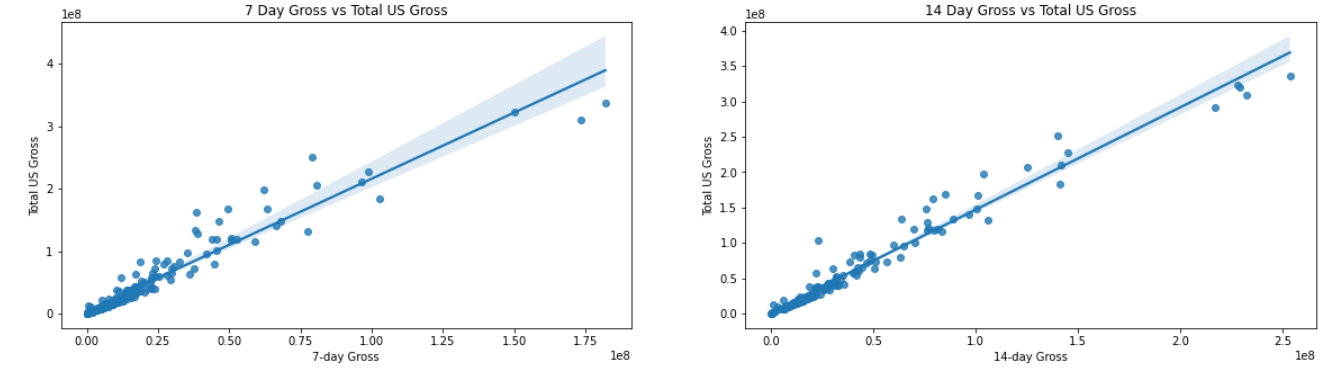

Text(0.5, 1.0, '14-day Gross vs Total US Gross')

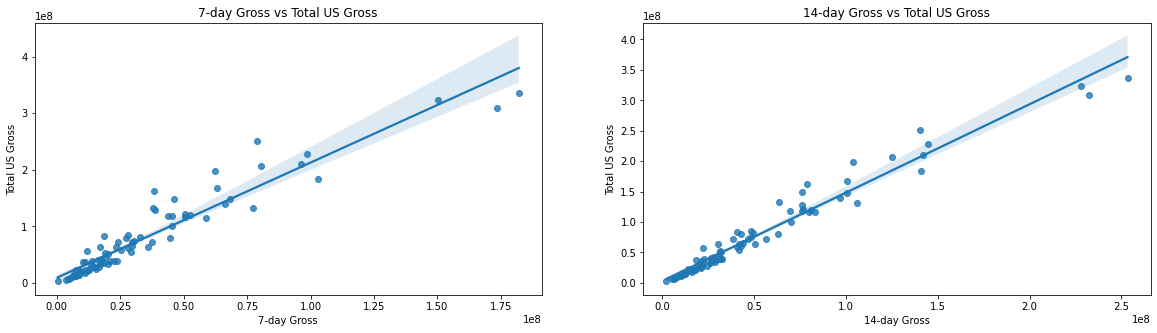

In [336]:
fig,axs = plt.subplots(1,2 ,figsize=(20,5))
sns.regplot(ax=axs[0],x= movies["7-day Gross"], y=movies["Total US Gross"])
axs[0].set_title("7-day Gross vs Total US Gross")
sns.regplot(ax=axs[1],x= movies["14-day Gross"], y=movies["Total US Gross"])
axs[1].set_title("14-day Gross vs Total US Gross")


4. What are the corresponding
values for $R$ and $R^2$?

R (7 Day Gross vs Total US Gross) = 0.959407544414305  
R² (7 Day Gross vs Total US Gross) = 0.9204628362790865  
R (14 Day Gross vs Total US Gross) = 0.9813238689021966  
R² (14) Day Gross vs Total US Gross) = 0.9629965356771755

In [337]:
cor = np.corrcoef(movies["7-day Gross"], movies["Total US Gross"])[0][1]
print(f"R (7 Day Gross) = {cor}")
print(f"R² = {cor ** 2}")

cor = np.corrcoef(movies["14-day Gross"], movies["Total US Gross"])[0][1]
print(f"R (7 Day Gross) = {cor}")
print(f"R² = {cor ** 2}")

R (7 Day Gross) = 0.9546454848370717
R² = 0.9113480017198077
R (7 Day Gross) = 0.9807311044212143
R² = 0.9618334991792546


5. What are the equations of the linear regression lines in the previous part?  
What exactly does intercept and slope tell you about the movie business?

7 days gross: ŷ = 4590921.233818144 + 2.1134647566101816 * x  
14 days gross: ŷ = 2449002.8925510645 + 1.44645307025908 * x

In [338]:
from sklearn.linear_model import LinearRegression

movies_x = movies["7-day Gross"].values.reshape(-1,1)
movies_y = movies["Total US Gross"]

weight_model = LinearRegression().fit(movies_x, movies_y)

print(f"7 day gross: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

movies_x = movies["14-day Gross"].values.reshape(-1,1)
movies_y = movies["Total US Gross"]

weight_model = LinearRegression().fit(movies_x, movies_y)

print(f"14 day gross: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")




7 day gross: ŷ = 9380048.64 + 2.03 x
14 day gross: ŷ = 3162434.30 + 1.45 x


6. In the previous scatterplots you can see some ouliers at the right side. These are movies that did great
during their first week or two. 
* What are these outliers? 
* Remove them out of the dataset (you can decide how many qualify).
* Give the new values for $R$ and $R^2$.
* Give the new values for the slope and the intercept of the regression lines. Do the outliers have a great effect?

<AxesSubplot:xlabel='14-day Gross'>

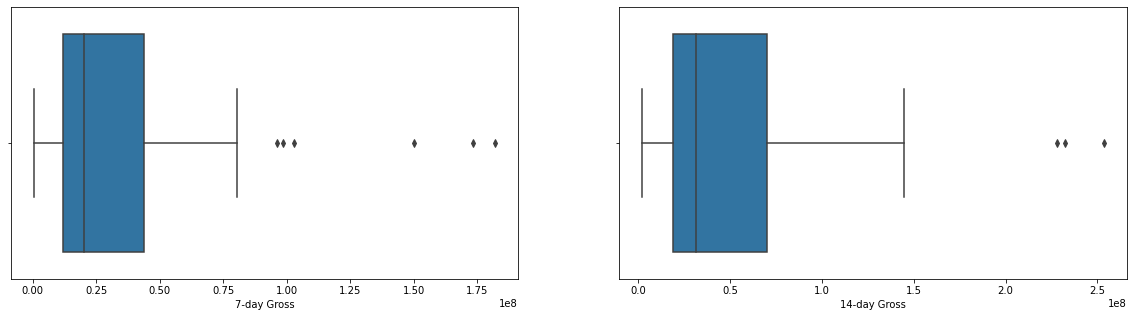

In [339]:
fig,axs = plt.subplots(1,2,figsize=(20,5))

sns.boxplot(ax= axs[0], x= movies["7-day Gross"])
sns.boxplot(ax = axs[1], x= movies["14-day Gross"])

In [345]:
movies2 = movies[movies['7-day Gross'] < 0.8 * 10**8] 
movies2.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,22707121.0,32109139.0,39517763.0,11000000.0,15909367.0,16000000.0
3,4.0,Stomp the Yard,Sony Pictures,Drama,28263594.0,42853277.0,61356221.0,15000000.0,33166898.0,14000000.0
8,9.0,Ghost Rider,Sony Pictures,Action,58960097.0,83257376.0,115802596.0,121900000.0,103699106.0,120000000.0
9,10.0,Saw III,Lionsgate,Horror,44576835.0,63279443.0,80238724.0,83638091.0,47124617.0,10000000.0
12,13.0,Ocean's Thirteen,Warner Bros.,Adventure,50705336.0,79668309.0,117144465.0,194600000.0,47716836.0,85000000.0


In [346]:
movies2 = movies2[movies['14-day Gross'] < 1.5 * 10**8] 

C:\Users\szymo\AppData\Local\Temp\ipykernel_12132\1839746262.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies2 = movies2[movies['14-day Gross'] < 1.5 * 10**8]


<AxesSubplot:xlabel='14-day Gross'>

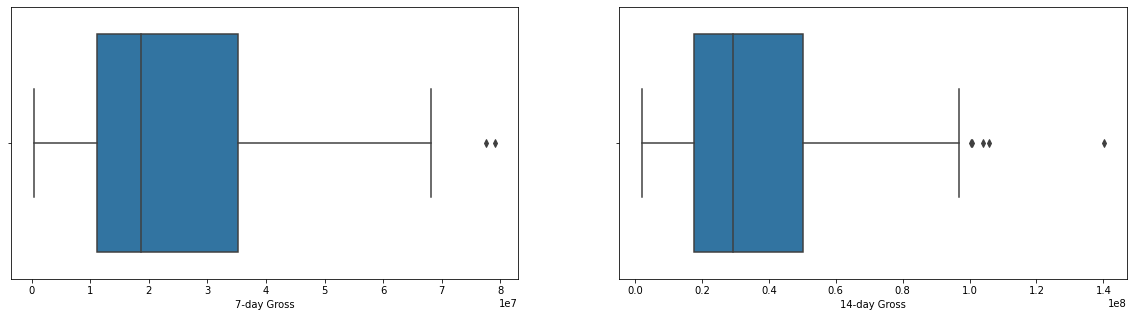

In [347]:
fig,axs = plt.subplots(1,2,figsize=(20,5))

sns.boxplot(ax= axs[0], x= movies2["7-day Gross"])
sns.boxplot(ax = axs[1], x= movies2["14-day Gross"])

In [348]:
mx = movies2["7-day Gross"].mean()
my = movies2["Total US Gross"].mean()

covar = sum((movies2["7-day Gross"] - mx) * (movies2["Total US Gross"] - my)) / (len(movies2["7-day Gross"]) - 1)
print(f"Cov(x,y) = {covar}")

# Correlation calculated from covariance
R1 = covar / (movies2["7-day Gross"].std() * movies2["Total US Gross"].std())
print(f"R (7 Day Gross vs Total US Gross) = {R1}")

Cov(x,y) = 877150802846669.1
R (7 Day Gross vs Total US Gross) = 0.9270472927356314


In [349]:
from sklearn.linear_model import LinearRegression

sevenDay_x = movies2["7-day Gross"].values.reshape(-1,1)
totalGross_y = movies2["Total US Gross"]

model = LinearRegression().fit(sevenDay_x, totalGross_y)

print(f"Regression line: ŷ = {model.intercept_} + {model.coef_[0]} x")

Regression line: ŷ = -1771769.664351523 + 2.515238425734776 x
